#Linear Regression from Scratch

#Generating the Data for Linear Regression

In [65]:
# Importing Libraries (numpy and pyplot)
import matplotlib.pyplot as plt
import numpy as np

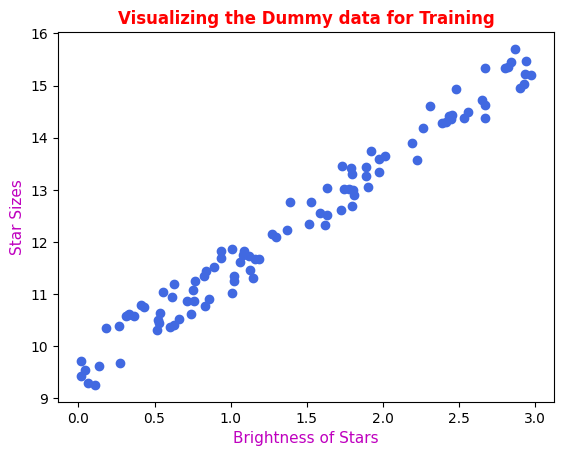

In [28]:
# Use seed value of 100 so that everyone gets the same output!
np.random.seed(100)

# Generating Randomized dataset --> X_train and y_train
'''
X_train = 3*random numbers between 0 and 1 of shape (100, 1)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100, 1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML model --> Linear Regression to predict the values of 9 and 2 in y_train.
In reality, we don't have y_train formula. Hence, we make ML model to predict what should be the formula!
'''
X_train = 3*np.random.rand(100, 1)
y_train = 2*X_train + 9 + np.random.rand(100, 1)

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title
plt.scatter(X_train, y_train, color='royalblue')
plt.title('Visualizing the Dummy data for Training', color='red', weight='bold')
plt.xlabel('Brightness of Stars', fontsize=11, color='m')
plt.ylabel('Star Sizes', fontsize=11, color='m')
plt.show()


In [29]:
# Print first 5 values in X_train and y_train
print(f'Here are the first 5 values in the X_train data:- ')
print(X_train[:5])

print(f'\nHere are the respective first 5 values in the y_train:- ')
print(y_train[:5])

Here are the first 5 values in the X_train data:- 
[[1.63021483]
 [0.83510816]
 [1.27355277]
 [2.5343284 ]
 [0.01415657]]

Here are the respective first 5 values in the y_train:- 
[[13.03871887]
 [11.44981471]
 [12.1574337 ]
 [14.37765714]
 [ 9.72604804]]


In [30]:
# Initialise the weight (W) and bias (b) to 0
W = 0
b = 0

# Hyperparameters --> Choose appropriate learning_rate (0.01)
learning_rate = 0.01


In [31]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    X - Full X array data (train/test)
    W - Weight value
    b - Bias value

    Returns:
        Predicted output
    '''
    return X * W + b

def cost_function(X, y, W, b):
    '''
    X - Full X array data (train/test)
    W - Weight value
    b - Bias value
    y - Full y array data (train/test)

    Returns - MSE (Mean Squared Error)
    '''
    y_pred = predict(X, W, b)
    squared_error = (y - y_pred)**2
    return np.mean(squared_error)

In [32]:
y_pred_dummy = predict(X_train, W, b)
print(len(y_pred_dummy))

len(y_train)

100


100

In [ ]:
# Check predict values
predict(X_train,W,b)

In [11]:
# Check for the cost_function
cost_function(X_train, y_train, W, b)

np.float64(155.64746471475698)

In [34]:
# MSE Gradient Descent Update Function
def update_params(X, y, W, b, learning_rate):
    '''
    X - Full X array data (train/test)
    y - Full y array data (train/test)
    W - Weight value
    b - Bias value
    learning_rate - alpha value --> step size

    Returns - Updated values for W and b
    '''

    error_term = y - predict(X, W, b)

    dJdW = np.mean(-2 * X * error_term)
    dJdb = np.mean(-2 * error_term)

    W = W - learning_rate * dJdW
    b = b - learning_rate * dJdb

    return W, b


In [35]:
# Check the update_params function
update_params(X_train, y_train, W, b, learning_rate)


(np.float64(0.37996848499034985), np.float64(0.2470683141174928))

In [38]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-13, verbose=False):
    '''
    X - Full X array data (train/test)
    y - Full y array data (train/test)
    W - Weight value
    b - Bias value
    learning_rate - alpha value --> step size
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True

    Returns -
    ---------
    weights - list of all the updated weight values in iterations (epochs)
    biases - list of all the updated bias values in the iterations
    costs - list of all the cost values based on W and b values in the iterations
    i - iteration count at the end of training
    '''

    # Lists of updated weights and biases and also the cost wrt these weights and biases
    weights = [W]
    biases = [b]
    costs = []
    i = 0

    '''

    0) Initialize the counter
    1) Get the cost value based on the current W and b
    2) Add this cost value to list of costs
    3) Break the training loop if the costs value are converging
    4) If the loop is not stopped, update the values of W and b
    5) Adding these values to the respective list of weights and biases
    6) Print the training progress after every 100 iterations
    7) Update the counter value

    '''
    while True:

        # Calculate the costs and append it to the respective list
        cost = cost_function(X, y, W, b)
        costs.append(cost)

        # Break the loop if the values in the costs list have converged
        if i >= 1 and abs(costs[-1] - costs[-2]) < tol:
            break

        # ---- MISSING PART (your bug) ----
        # Update W and b
        W, b = update_params(X, y, W, b, learning_rate)

        # Store updated values
        weights.append(W)
        biases.append(b)
        # ---------------------------------

        # Print training history
        if verbose and ((i+1) % 100 == 0):
            print(f"After {i+1} iterations, weight = {W}, bias = {b}, cost = {cost}")

        # Update counter
        i += 1

    return weights, biases, costs, i

In [39]:
# Train the linear regression model
weights, biases, costs, epochs = train(X_train, y_train, W, b, learning_rate, tol=1e-13, verbose=True)


After 100 iterations, weight = 4.3222942048210085, bias = 5.327063373770924, cost = 5.059233469917248
After 200 iterations, weight = 3.51412009319501, bias = 6.7890242662687115, cost = 2.2086697160039885
After 300 iterations, weight = 2.9835540281786326, bias = 7.743346998568343, cost = 0.9907861469991488
After 400 iterations, weight = 2.6367501624690695, bias = 8.367135449635883, cost = 0.4704415777246173
After 500 iterations, weight = 2.410063191668252, bias = 8.77487229347111, cost = 0.24812273077542904
After 600 iterations, weight = 2.2618901532412243, bias = 9.041387862566092, cost = 0.15313630711057427
After 700 iterations, weight = 2.1650374349793493, bias = 9.215594706132114, cost = 0.11255306010092578
After 800 iterations, weight = 2.101730040231323, bias = 9.329464317758527, cost = 0.09521374070874238
After 900 iterations, weight = 2.0603494130098348, bias = 9.403894737290441, cost = 0.08780546219143534
After 1000 iterations, weight = 2.0333011303240744, bias = 9.452545885499

In [42]:
# Comparing initial and final values
import pandas as pd

initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]

df = pd.DataFrame(
    list(zip(initial, final)),
    columns=['Initial', 'Final'],
    index=['Weight', 'Bias', 'Cost']
)
df

,Initial,Final
Weight,0.000000,1.982259
Bias,0.000000,9.544355
Cost,155.647465,0.082279


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabel'

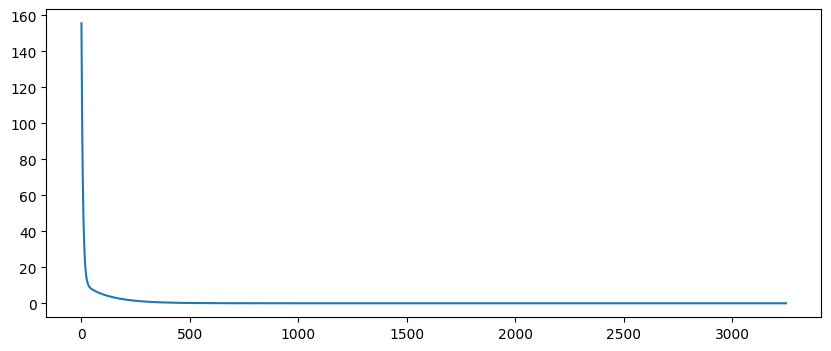

In [63]:
# Visualising the cost wrt epochs --> Figsize is (10,4), plot epochs on x, costs on y, add labels and title

plt.figure(figsize=(10, 4))
plt.plot(costs)

plt.xlabel('Epochs', color='m', fontsize=11)
plt.ylabel('Cost', color='m', fontsize=11)

plt.title(f'Display Cost change vs Epochs (Total of {epochs})')

plt.show()


In [44]:
# Define a seed value (using different seed value compared to training set to avoid data leakage!)
np.random.seed(5007)   # This number was chosen to get optimal results with random values

# Test data
X_test = 3 * np.random.rand(10, 1)
y_test = 9 + 2 * X_test + np.random.rand(10, 1)

prediction = predict(X_test, weights[-1], biases[-1])

In [45]:
# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(
    list(zip(
        X_test.reshape(10,),
        y_test.reshape(10,),
        prediction.reshape(10,)
    )),
    columns=['Test Input', 'True Output', 'Predicted Output']
)

df1


,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.979186
1,1.900129,13.358554,13.310902
2,0.126943,9.974414,9.795988
3,2.026471,13.566160,13.561344
4,2.647429,14.842352,14.792244
5,1.238825,12.071978,12.000027
6,1.561243,12.881255,12.639142
7,2.042729,13.622504,13.593573
8,1.230220,12.098017,11.982969
9,0.382516,10.325675,10.302601


In [46]:
# Calculate the mean squared error to evaluate the performance
mse = np.mean((y_test - prediction)**2)

print(f'The MSE for the test data:- {round(mse, 5)} (5dp)')


The MSE for the test data:- 0.01231 (5dp)


In [48]:
# Calculate the root mean squared error to evaluate the performance
mse = np.sqrt(np.mean((y_test - prediction)**2))

print(f'The RMSE for the test data:- {round(mse, 5)} (5dp)')


The RMSE for the test data:- 0.11095 (5dp)


In [75]:
# SAFELY RESET ANY ACCIDENTAL OVERRIDES
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)


In [80]:
def plot_test_results(X_test, y_test, prediction):
    """
    Visualize predicted outputs vs. true outputs for test data.
    """

    plt.figure(figsize=(10, 4))

    # Predicted outputs (line)
    plt.plot(
        X_test, prediction,
        label='Predicted Outputs',
        color='black',
        lw=0.8
    )

    # True outputs (scatter)
    plt.scatter(
        X_test, y_test,
        label='True Outputs',
        marker='x',
        color='black',
        zorder=3,
        s=30
    )

    # Labels and styling
    plt.xlabel('Test Brightness', color='maroon', fontsize=11)
    plt.ylabel('Size of Stars', color='maroon', fontsize=11)
    plt.title('Performance of Linear Regression on Test Data', color='royalblue', fontsize=12)

    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


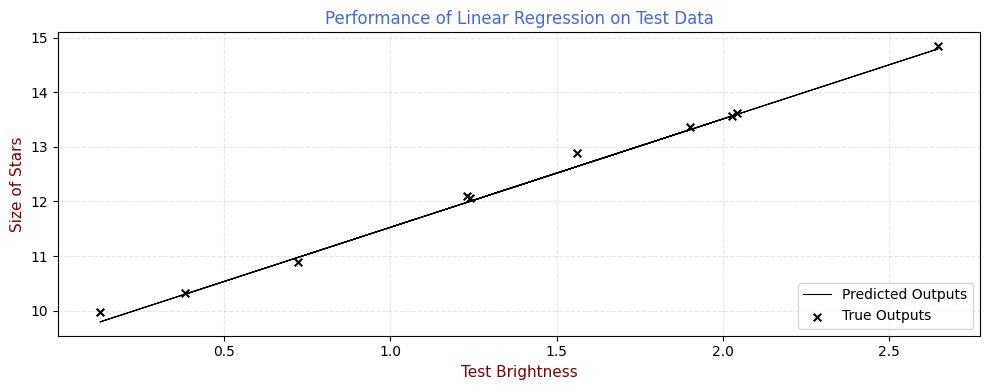

In [81]:
plot_test_results(X_test, y_test, prediction)
